In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score, roc_curve, recall_score, precision_score
print(tf.__version__)

2.13.0


# data preprocessing and split

In [3]:
data = pd.read_csv('/Users/ujong-yun/Documents/학부연구생/학부연구생 - dataset 공유 (csv).csv')
data = data.dropna()
data

,Case,Engine Speed,Spark Timing,Throttle Angle,Ambient Temperature,Intake Pressure,Intake Temperature,Exhaust Pressure,Exhaust Temperature,Injected Mass,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO,Knocking Index,Knocking
1,0.0,1000,-30,30,283,0.988,292.1,1.019,671.9,33.27,67.2,3.69,4.31,6.55,7.48,364,4.06,245.1,469.0,1.0
2,1.0,1000,-30,30,293,0.988,297.4,1.019,671.1,33.15,66.9,3.73,4.29,6.52,7.42,365.9,3.94,250.8,477.0,1.0
3,2.0,1000,-30,30,303,0.988,302.6,1.019,670.9,33.03,66.6,3.76,4.26,6.48,7.38,367.1,3.89,253.8,485.0,1.0
4,3.0,1000,-30,35,283,0.991,292.3,1.02,673.2,33.57,67.8,3.3,4.42,6.59,7.51,365.4,4.2,246.9,454.0,1.0
5,4.0,1000,-30,35,293,0.991,297.4,1.02,672.2,33.44,67.5,3.34,4.39,6.55,7.46,367.5,4.05,253.2,461.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2140.0,6000,-10,85,293,0.969,294.1,1.493,1088.4,48.07,33.1,36.97,0.78,8.13,10.29,426,1.73,403,0.0,0.0
2142,2141.0,6000,-10,85,303,0.969,301.6,1.488,1089.5,47.74,33.3,36.99,0.78,8.08,10.27,425.9,1.81,402.8,0.0,0.0
2143,2142.0,6000,-10,90,283,0.97,286.6,1.498,1088.9,48.4,32.9,37.96,0.78,8.2,10.31,424.8,1.72,399.2,0.0,0.0
2144,2143.0,6000,-10,90,293,0.969,294.1,1.493,1088.5,48.08,33.1,36.97,0.78,8.14,10.29,425.9,1.74,402.7,0.0,0.0


In [4]:
len_0 = len(data.loc[data['Knocking'] == 0])
len_1 = len(data.loc[data['Knocking'] == 1])
print(len_0)
print(len_1)

1064
1081


In [5]:
X_data = data.loc[:, ['Engine Speed', 'Spark Timing', 'Throttle Angle', 'Ambient Temperature', 
                                   'Intake Pressure', 'Intake Temperature','Exhaust Pressure', 'Exhaust Temperature', 'Injected Mass']]
y_data = data['Knocking']
print(X_data)
print(y_data)

     Engine Speed Spark Timing Throttle Angle Ambient Temperature   
1            1000          -30             30                 283  \
2            1000          -30             30                 293   
3            1000          -30             30                 303   
4            1000          -30             35                 283   
5            1000          -30             35                 293   
...           ...          ...            ...                 ...   
2141         6000          -10             85                 293   
2142         6000          -10             85                 303   
2143         6000          -10             90                 283   
2144         6000          -10             90                 293   
2145         6000          -10             90                 303   

     Intake Pressure Intake Temperature Exhaust Pressure Exhaust Temperature   
1              0.988              292.1            1.019               671.9  \
2          

In [6]:
train_input, test_input, train_output, test_output = train_test_split(X_data, y_data,test_size=0.2, shuffle=True, random_state=42)
train_input, val_input, train_output, val_output = train_test_split(train_input, train_output, test_size = 0.25, shuffle=True, random_state=42) # train, validation, test 비율 조정, 함수 만들어 보기
print(train_input.shape)
print(train_output.shape)
print(val_input.shape)
print(val_output.shape)
print(test_input.shape)
print(test_output.shape)


(1287, 9)
(1287,)
(429, 9)
(429,)
(429, 9)
(429,)


In [7]:

ss = StandardScaler()
ss.fit(train_input)
train_scale = ss.transform(train_input)
val_scale = ss.transform(val_input)
test_scale = ss.transform(test_input)
print(train_scale)
print(val_scale)
print(test_scale)

[[ 0.94116682 -1.42752381 -0.27742293 ...  0.8590414   0.36974684
   0.96453667]
 [ 1.57418573 -1.42752381 -0.80834236 ...  1.1903374   0.59817701
   0.32597037]
 [ 0.3081479  -0.01318729  0.78441592 ...  0.3068814   0.39817806
   0.87128571]
 ...
 [ 1.57418573  1.40114924 -1.07380208 ...  1.58053047  2.0579733
   0.10500616]
 [-1.27439938 -0.72035555  0.78441592 ... -1.15082099 -1.44789072
  -1.15185449]
 [-0.95788993 -0.72035555  0.78441592 ... -1.01094046 -0.7988745
  -0.74438837]]
[[-1.27439938  1.40114924 -1.33926179 ... -1.12873459 -0.8371096
  -1.51269512]
 [-1.59090884  1.40114924  0.51895621 ... -1.32015006 -1.63710542
  -1.84515504]
 [-0.95788993 -1.42752381 -1.33926179 ... -1.03302686 -0.93024637
  -0.91264552]
 ...
 [-0.95788993 -1.42752381 -0.27742293 ... -1.02566473 -0.88122701
  -0.80520421]
 [ 1.57418573 -0.72035555 -1.33926179 ...  0.94002487  0.77562707
  -0.35719421]
 [-0.32487101 -0.72035555 -0.27742293 ... -0.488229   -0.31848486
   0.2408282 ]]
[[ 0.3081479   1.40

# DNN Model 

In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape = (9,)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2021 (7.89 KB)
Trainable params: 2021 (7.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [10]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-classification-model.h5')
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_scale, train_output, epochs=1000, batch_size = 64, validation_data=(val_scale, val_output), callbacks=[callback, checkpoint_cb])


Epoch 1/1000
21/21 [==============================] - 1s 7ms/step - loss: 0.5707 - accuracy: 0.7172 - val_loss: 0.4567 - val_accuracy: 0.8298
Epoch 2/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8228 - val_loss: 0.3415 - val_accuracy: 0.8881
Epoch 3/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8702 - val_loss: 0.2602 - val_accuracy: 0.9207
Epoch 4/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.2565 - accuracy: 0.9106 - val_loss: 0.2067 - val_accuracy: 0.9324
Epoch 5/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.2141 - accuracy: 0.9375

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9192 - val_loss: 0.1716 - val_accuracy: 0.9557
Epoch 6/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9324 - val_loss: 0.1502 - val_accuracy: 0.9580
Epoch 7/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9409 - val_loss: 0.1316 - val_accuracy: 0.9720
Epoch 8/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.9472 - val_loss: 0.1257 - val_accuracy: 0.9674
Epoch 9/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.1378 - accuracy: 0.9464 - val_loss: 0.1194 - val_accuracy: 0.9650
Epoch 10/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.1298 - accuracy: 0.9549 - val_loss: 0.1121 - val_accuracy: 0.9697
Epoch 11/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.1221 - accuracy: 0.9604 - val_loss: 0.1058 - val_accuracy: 0.9697
Epoch 12/1000
21/

In [11]:
model.save('best-classification-model.h5')
mode = keras.models.load_model('best-classification-model.h5')

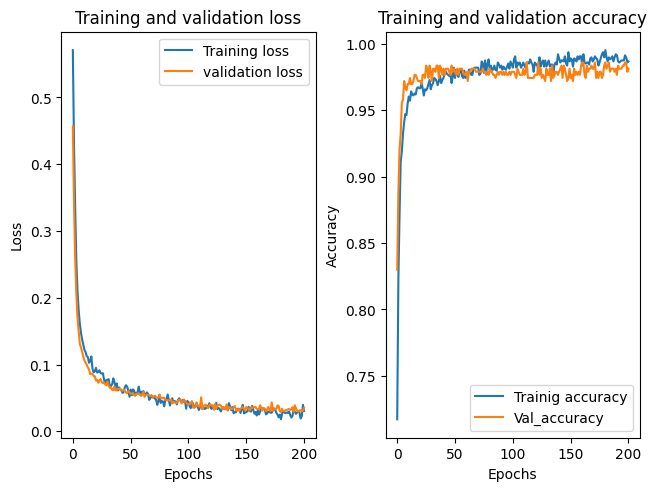

In [12]:
history_dic = history.history
loss = history_dic['loss']
val_loss = history_dic['val_loss']
accuracy = history_dic['accuracy']
val_accuracy = history_dic['val_accuracy']
fig, axs= plt.subplots(1, 2, constrained_layout = True)
axs[0].plot(loss, label = 'Training loss')
axs[0].plot(val_loss, label = 'validation loss')
axs[1].plot(accuracy, label = 'Trainig accuracy')
axs[1].plot(val_accuracy, label = 'Val_accuracy')
axs[0].set_title('Training and validation loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[1].set_title('Training and validation accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[0].legend()
axs[1].legend()
plt.show()
# loss값 파일 저장 및 출력 필요


In [13]:
loss_accuracy_df = pd.DataFrame(((loss[i], val_loss[i], accuracy[i], val_accuracy[i]) for i in range(len(history.epoch))), columns=['Loss', 'Val_Loss', 'Accuracy', 'Val_Accuracy'])
loss_accuracy_df

,Loss,Val_Loss,Accuracy,Val_Accuracy
0,0.570712,0.456700,0.717172,0.829837
1,0.430299,0.341480,0.822844,0.888112
2,0.337391,0.260231,0.870241,0.920746
3,0.256515,0.206734,0.910645,0.932401
4,0.210512,0.171568,0.919192,0.955711
...,...,...,...,...
196,0.027959,0.031315,0.987568,0.983683
197,0.019228,0.031440,0.991453,0.986014
198,0.022767,0.030011,0.989899,0.986014
199,0.039573,0.031072,0.986014,0.979021


In [14]:
loss_accuracy_df.to_csv('loss_and_accuracy.csv', index=True)

In [15]:
loss_and_accuracy_test = model.evaluate(test_scale, test_output)
loss_and_accuracy_train = model.evaluate(train_scale, train_output)
loss_and_accuracy_val = model.evaluate(val_scale, val_output)
print(loss_and_accuracy_test)
print(loss_and_accuracy_train)
print(loss_and_accuracy_val)
print('loss = ', loss_and_accuracy_test[0])
print('loss = ', loss_and_accuracy_train[0])
print('loss = ', loss_and_accuracy_val[0])
print('accuracy = ', loss_and_accuracy_train[1])
print('accuracy = ', loss_and_accuracy_val[1])
print('accuracy = ', loss_and_accuracy_test[1])

14/14 [==============================] - 0s 726us/step - loss: 0.0288 - accuracy: 0.9860
[0.029944244772195816, 0.9860140085220337]
[0.01663503609597683, 0.9930070042610168]
[0.028809454292058945, 0.9860140085220337]
loss =  0.029944244772195816
loss =  0.01663503609597683
loss =  0.028809454292058945
accuracy =  0.9930070042610168
accuracy =  0.9860140085220337
accuracy =  0.9860140085220337


In [16]:
predicted_test = model.predict(test_scale)
predicted_train = model.predict(train_scale)
predicted_val = model.predict(val_scale)


14/14 [==============================] - 0s 486us/step


0.9864
0.9929
0.987


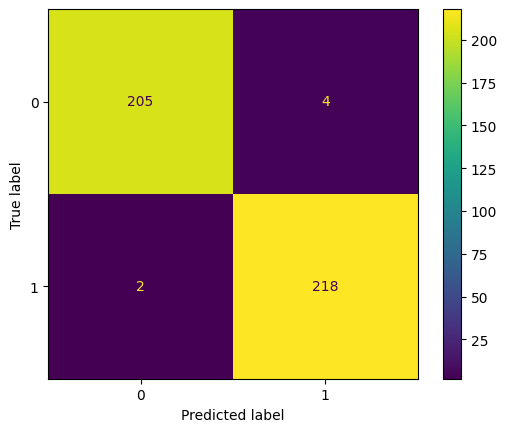

In [17]:
#Confusion matrix
predicted_test = np.array([1 if x >= 0.5 else 0 for x in predicted_test])
predicted_train = np.array([1 if x >= 0.5 else 0 for x in predicted_train])
predicted_val = np.array([1 if x >= 0.5 else 0 for x in predicted_val])

actual_test = np.array(test_output)
actual_train = np.array(train_output)
actual_val = np.array(val_output)

conf_matrix = confusion_matrix(actual_test, predicted_test)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()

#f1-score
print(round(f1_score(actual_test, predicted_test), 4))
print(round(f1_score(actual_train, predicted_train), 4))
print(round(f1_score(actual_val, predicted_val), 4))

In [18]:
print(predicted_test)
print(predicted_train)
print(predicted_val)

[0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0
 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1
 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1
 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1
 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0
 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1
 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0]
[1 0 0 ... 0 1 1]
[1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1
 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0

In [19]:
test_df = pd.DataFrame(((predicted_test[i]) for i in range(len(test_output))), columns=['Predicted_test'], index = test_output.index)
test_df['Raw_test'] = (test_output)
test_df

,Predicted_test,Raw_test
1345,0,0.0
1935,0,0.0
129,1,1.0
333,1,1.0
1164,0,0.0
...,...,...
545,1,1.0
1201,1,1.0
509,1,1.0
1333,0,0.0


In [20]:
train_df = pd.DataFrame(((predicted_train[i]) for i in range(len(train_output))), columns=['Predicted_train'], index = train_output.index)
train_df['Raw_train'] = (train_output)
train_df

,Predicted_train,Raw_train
1578,1,1.0
1962,0,0.0
1278,0,0.0
58,1,1.0
94,1,1.0
...,...,...
2109,0,0.0
471,1,1.0
2113,0,0.0
263,1,1.0


In [21]:
validation_df = pd.DataFrame(((predicted_val[i]) for i in range(len(val_output))), columns=['Predicted_val'], index = val_output.index)
validation_df['Raw_validation'] = (val_output)
validation_df

,Predicted_val,Raw_validation
356,1,1.0
181,1,1.0
395,1,1.0
1487,0,0.0
168,1,1.0
...,...,...
524,1,1.0
1137,0,0.0
407,1,1.0
1993,0,0.0


In [22]:
test_df.to_csv('Test_df.csv', index=True)
train_df.to_csv('Train_df.csv', index=True)
validation_df.to_csv('Validation_df.csv', index=True)

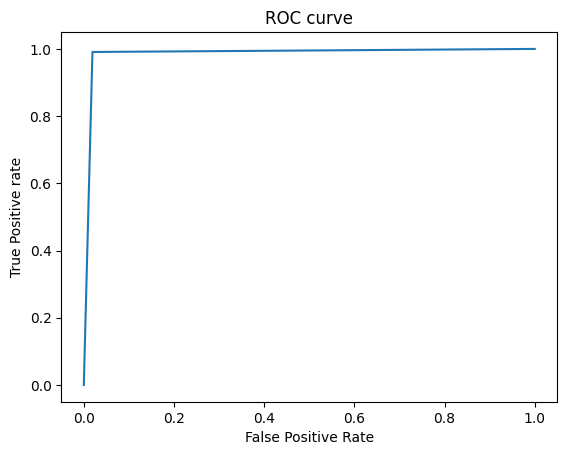

0.9858851674641148


In [23]:
#ROC CURVE
fpr, tpr, thresh = roc_curve(actual_test, predicted_test, pos_label=1)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()
    
#AUC    
auc_score1 = roc_auc_score(actual_test, predicted_test)
print(auc_score1)

In [24]:
print(round(recall_score(test_output, predicted_test), 4))
print(round(recall_score(train_output, predicted_train), 4))
print(round(recall_score(val_output, predicted_val), 4))

0.9909
0.9905
0.9913


In [25]:
print(round(precision_score(test_output, predicted_test), 4))
print(round(precision_score(train_output, predicted_train), 4))
print(round(precision_score(val_output, predicted_val), 4))

0.982
0.9952
0.9827


In [26]:
data = [[round(loss_and_accuracy_test[0], 4), round(loss_and_accuracy_train[1], 4), round(recall_score(test_output, predicted_test), 4), round(precision_score(test_output, predicted_test), 4), round(f1_score(actual_test, predicted_test), 4)],
        [round(loss_and_accuracy_train[0], 4), round(loss_and_accuracy_train[1], 4),round(recall_score(train_output, predicted_train), 4), round(precision_score(train_output, predicted_train), 4), round(f1_score(actual_train, predicted_train), 4)],
        [round(loss_and_accuracy_val[0], 4), round(loss_and_accuracy_val[1], 4),round(recall_score(val_output, predicted_val), 4), round(precision_score(val_output, predicted_val), 4), round(f1_score(actual_val, predicted_val), 4)]]
index = ['Loss', 'Accuracy', 'Recall', 'Precision', 'F1_score']
print(data)


[[0.0299, 0.993, 0.9909, 0.982, 0.9864], [0.0166, 0.993, 0.9905, 0.9952, 0.9929], [0.0288, 0.986, 0.9913, 0.9827, 0.987]]


In [27]:
metrics_df = pd.DataFrame(data, columns = index, index= ['Test', 'Train', 'Validation'])
metrics_df.to_csv('Binary_Classification_Metrics.csv')
metrics_df

,Loss,Accuracy,Recall,Precision,F1_score
Test,0.0299,0.993,0.9909,0.9820,0.9864
Train,0.0166,0.993,0.9905,0.9952,0.9929
Validation,0.0288,0.986,0.9913,0.9827,0.9870
